In [2]:
!pip install pandas numpy scikit-learn imbalanced-learn joblib seaborn matplotlib

In [4]:
!pip install imbalanced-learn

In [5]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report, roc_auc_score, roc_curve
import joblib
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
# Load the dataset
data = pd.read_csv('/Users/divit/Documents/Project Exibitiion/Datasets/Approved/credit_risk_dataset.csv')

# Inspect the first few rows
data.head()

# Check for missing values
print(data.isnull().sum())


person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              895
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3116
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64


In [7]:
data['cb_person_default_on_file'] = data['cb_person_default_on_file'].map({'Y': 1, 'N': 0})

In [8]:
def assign_loan_grade(loan_amnt):
    if loan_amnt <= 5000:
        return 'A'
    elif loan_amnt <= 10000:
        return 'B'
    elif loan_amnt <= 15000:
        return 'C'
    elif loan_amnt <= 20000:
        return 'D'
    elif loan_amnt <= 25000:
        return 'E'
    elif loan_amnt <= 30000:
        return 'F'
    else:
        return 'G'

data['loan_grade'] = data['loan_amnt'].apply(assign_loan_grade)

In [9]:
# Loan Percent Income
data['loan_percent_income'] = data['loan_amnt'] / data['person_income']

# Credit History to Employment Ratio
data['credit_history_to_employment_ratio'] = data['cb_person_cred_hist_length'] / data['person_emp_length']

In [10]:
data = pd.get_dummies(data, columns=['person_home_ownership', 'loan_intent'], drop_first=True)

In [11]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder

# Step 1: Load the dataset
data = pd.read_csv('/Users/divit/Documents/Project Exibitiion/Datasets/Approved/credit_risk_dataset.csv')

# Step 2: Replace infinite values and NaNs
data.replace([np.inf, -np.inf], np.nan, inplace=True)

# Step 3: Handle missing values in the target column (loan_status)
data = data.dropna(subset=['loan_status'])

# Step 4: Separate numeric and categorical columns
numeric_columns = data.select_dtypes(include=['float64', 'int64']).columns
categorical_columns = data.select_dtypes(include=['object']).columns

# Step 5: Impute missing values
numeric_imputer = SimpleImputer(strategy='median')
data[numeric_columns] = numeric_imputer.fit_transform(data[numeric_columns])

categorical_imputer = SimpleImputer(strategy='most_frequent')
data[categorical_columns] = categorical_imputer.fit_transform(data[categorical_columns])

# Step 6: Encode categorical features using LabelEncoder
label_encoders = {}
for column in ['person_home_ownership', 'loan_intent', 'loan_grade']:
    encoder = LabelEncoder()
    data[column] = encoder.fit_transform(data[column])
    label_encoders[column] = dict(zip(encoder.classes_, encoder.transform(encoder.classes_)))

# Step 7: Calculate derived feature - loan_percent_income
data['loan_percent_income'] = data['loan_amnt'] / data['person_income']

# Step 8: Dynamically assign loan grades if not already in dataset
if 'loan_grade' not in data.columns:
    def assign_loan_grade(amount):
        if amount <= 5000:
            return "A"
        elif amount <= 10000:
            return "B"
        elif amount <= 15000:
            return "C"
        elif amount <= 20000:
            return "D"
        elif amount <= 25000:
            return "E"
        elif amount <= 30000:
            return "F"
        else:
            return "G"
    data['loan_grade'] = data['loan_amnt'].apply(assign_loan_grade)

# Step 9: Calculate derived feature - credit_history_to_employment_ratio
data['credit_history_to_employment_ratio'] = (
    data['cb_person_cred_hist_length'] / (data['person_emp_length'] + 1)
)

# Step 10: Convert 'cb_person_default_on_file' from 'N'/'Y' to 0/1
data['cb_person_default_on_file'] = data['cb_person_default_on_file'].map({'N': 0, 'Y': 1})

# Step 11: Remove extreme outliers
age_threshold = 100  # Assuming age > 100 is not realistic
income_threshold = data['person_income'].quantile(0.99)  # 99th percentile for income
data = data[
    (data['person_age'] <= age_threshold) &
    (data['person_income'] <= income_threshold)
]

# Step 12: Validate no missing values
if data.isnull().sum().sum() > 0:
    print("Missing values detected. Addressing...")
    # Re-impute missing values if necessary
    data[numeric_columns] = numeric_imputer.transform(data[numeric_columns])
    data[categorical_columns] = categorical_imputer.transform(data[categorical_columns])
    # Validate again
    if data.isnull().sum().sum() > 0:
        raise ValueError("The dataset still contains missing values!")

# Step 13: Verify required features
required_features = [
    'person_age', 'person_income', 'person_emp_length', 'loan_amnt', 'loan_int_rate',
    'loan_percent_income', 'cb_person_cred_hist_length', 'cb_person_default_on_file',
    'credit_history_to_employment_ratio', 'person_home_ownership', 'loan_intent', 'loan_grade'
]

missing_features = [feature for feature in required_features if feature not in data.columns]
if missing_features:
    print("Missing features in the processed dataset:", missing_features)
    for feature in missing_features:
        data[feature] = 0  # Add missing features with default value

# Step 14: Save the label encoders for future use
for feature, mapping in label_encoders.items():
    print(f"Label encoding for {feature}: {mapping}")

# Step 15: Separate features (X) and target (y)
X = data.drop(columns=['loan_status'])
y = data['loan_status']

# Final checks
print("Processed Dataset Shape (X):", X.shape)
print("Processed Dataset Shape (y):", y.shape)
print("Processed Dataset Columns:", list(X.columns))
print("Unique values in cb_person_default_on_file:", X['cb_person_default_on_file'].unique())
print("Feature completeness check complete.")

# Save the processed dataset to a CSV file
data.to_csv('/Users/divit/Documents/Project Exibitiion/Datasets/Approved/processed_credit_risk_dataset_encoded.csv', index=False)

print("Processed dataset saved successfully.")


Label encoding for person_home_ownership: {'MORTGAGE': np.int64(0), 'OTHER': np.int64(1), 'OWN': np.int64(2), 'RENT': np.int64(3)}
Label encoding for loan_intent: {'DEBTCONSOLIDATION': np.int64(0), 'EDUCATION': np.int64(1), 'HOMEIMPROVEMENT': np.int64(2), 'MEDICAL': np.int64(3), 'PERSONAL': np.int64(4), 'VENTURE': np.int64(5)}
Label encoding for loan_grade: {'A': np.int64(0), 'B': np.int64(1), 'C': np.int64(2), 'D': np.int64(3), 'E': np.int64(4), 'F': np.int64(5), 'G': np.int64(6)}
Processed Dataset Shape (X): (32252, 12)
Processed Dataset Shape (y): (32252,)
Processed Dataset Columns: ['person_age', 'person_income', 'person_home_ownership', 'person_emp_length', 'loan_intent', 'loan_grade', 'loan_amnt', 'loan_int_rate', 'loan_percent_income', 'cb_person_default_on_file', 'cb_person_cred_hist_length', 'credit_history_to_employment_ratio']
Unique values in cb_person_default_on_file: [1 0]
Feature completeness check complete.
Processed dataset saved successfully.


Selected Threshold: 0.6
Random Forest Accuracy: 0.8972
Random Forest AUC–ROC: 0.9108

Classification Report:
              precision    recall  f1-score   support

         0.0       0.92      0.95      0.93      7556
         1.0       0.79      0.72      0.75      2120

    accuracy                           0.90      9676
   macro avg       0.86      0.83      0.84      9676
weighted avg       0.89      0.90      0.90      9676



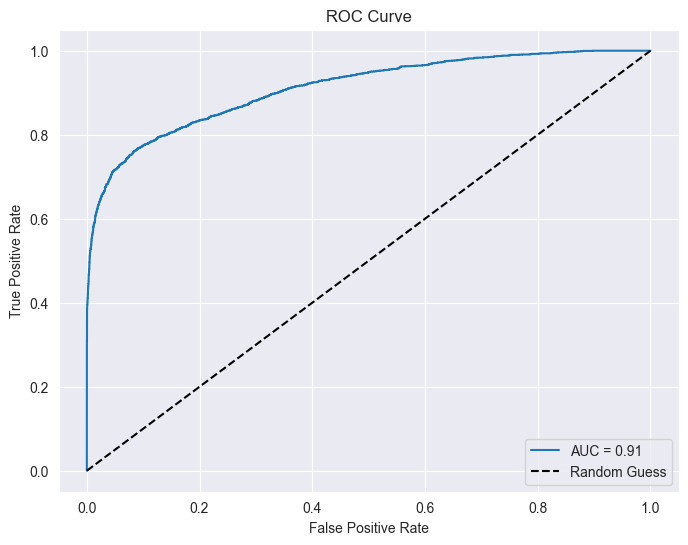

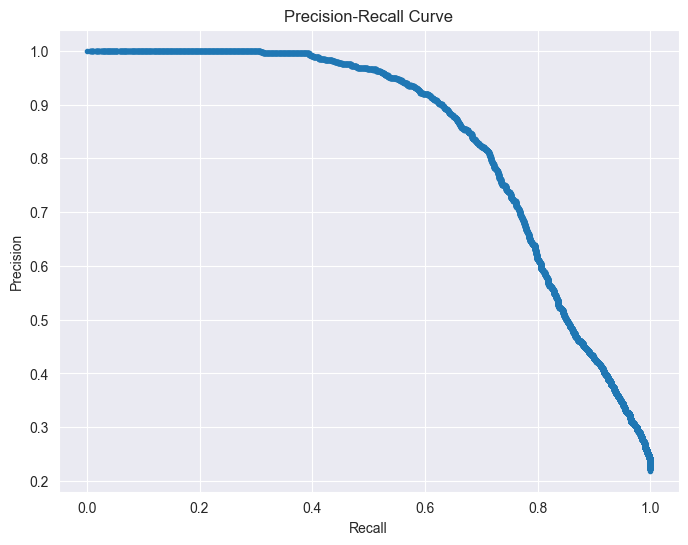

True Positive Rate (TPR): 0.7198
False Positive Rate (FPR): 0.0531


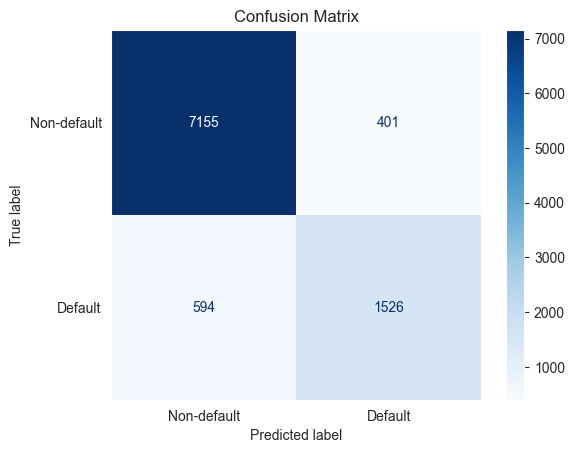

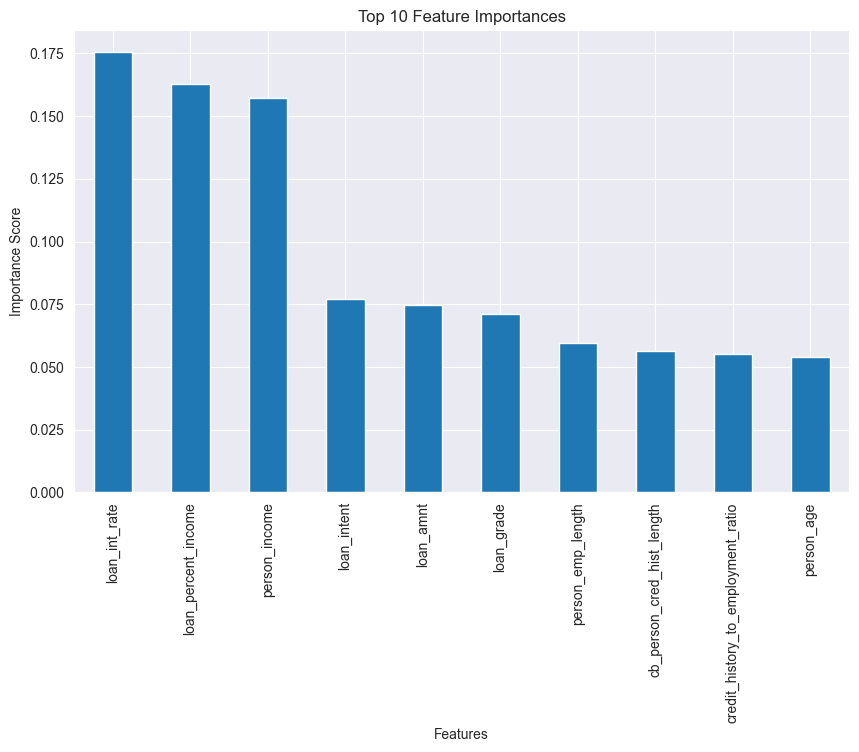

In [18]:
# Import necessary libraries
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import (
    roc_curve,
    confusion_matrix,
    ConfusionMatrixDisplay,
    classification_report,
    roc_auc_score,
    precision_recall_curve,
    make_scorer
)
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from imblearn.over_sampling import SMOTE, ADASYN
from imblearn.combine import SMOTETomek
import pandas as pd
import numpy as np
import joblib

# Step 1: Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Step 2: Apply resampling technique to balance the dataset
resampler = SMOTETomek(random_state=42)
X_train_resampled, y_train_resampled = resampler.fit_resample(X_train, y_train)

# Step 3: Define the Random Forest model with adjusted class weights
model = RandomForestClassifier(
    n_estimators=200,
    max_features='sqrt',
    min_samples_split=5,
    min_samples_leaf=2,
    max_depth=None,
    class_weight={0: 1, 1: 5},  # Increasing weight for class 1
    random_state=42
)

# Step 4: Train the model
model.fit(X_train_resampled, y_train_resampled)

# Step 5: Predict probabilities for test data
y_pred_proba = model.predict_proba(X_test)[:, 1]

# Step 6: Adjust the decision threshold for better recall
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_proba)

# Test multiple thresholds and select the one that balances precision and recall
optimal_threshold = 0.60  # Adjusted threshold (can test different values)

print(f"Selected Threshold: {optimal_threshold}")

# Apply the threshold to classify
y_pred_adjusted = (y_pred_proba >= optimal_threshold).astype(int)

# Step 7: Evaluate the model
accuracy = np.mean(y_pred_adjusted == y_test)
auc_roc = roc_auc_score(y_test, y_pred_proba)
print(f"Random Forest Accuracy: {accuracy:.4f}")
print(f"Random Forest AUC–ROC: {auc_roc:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_adjusted))

# Save the model and threshold
joblib.dump(model, "/Users/divit/Documents/Project Exibitiion/Model/working (1- 0.72)/credit_risk_model_v2.pkl")
joblib.dump(optimal_threshold, "/Users/divit/Documents/Project Exibitiion/Model/working (1- 0.72)/optimal_threshold_v2.pkl")

# Step 8: Plot and save graphs for the model
# 8.1 ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"AUC = {auc_roc:.2f}")
plt.plot([0, 1], [0, 1], 'k--', label="Random Guess")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="lower right")
# plt.grid(False)  # Disable gridlines
plt.savefig("/Users/divit/Documents/Project Exibitiion/Model/working (1- 0.72)/roc_curve_v2.png")
plt.show()

# 8.2 Precision-Recall Curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, marker='.')
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
# plt.grid(False)
plt.savefig("/Users/divit/Documents/Project Exibitiion/Model/working (1- 0.72)/precision_recall_curve_v2.png")
plt.show()

# 8.3 Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred_adjusted)
tn, fp, fn, tp = conf_matrix.ravel()

# Calculate TPR and FPR
tpr = tp / (tp + fn)  # True Positive Rate
fpr = fp / (fp + tn)  # False Positive Rate

print(f"True Positive Rate (TPR): {tpr:.4f}")
print(f"False Positive Rate (FPR): {fpr:.4f}")

ConfusionMatrixDisplay(conf_matrix, display_labels=["Non-default", "Default"]).plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.grid(False)
plt.savefig("/Users/divit/Documents/Project Exibitiion/Model/working (1- 0.72)/confusion_matrix_v2.png")
plt.show()

# 8.4 Feature Importances
feature_importances = pd.Series(model.feature_importances_, index=X.columns)
plt.figure(figsize=(10, 6))
feature_importances.sort_values(ascending=False).head(10).plot(kind='bar')
plt.title("Top 10 Feature Importances")
plt.xlabel("Features")
plt.ylabel("Importance Score")
# plt.grid(False)
plt.savefig("/Users/divit/Documents/Project Exibitiion/Model/working (1- 0.72)/feature_importances_v2.png")
plt.show()